#Importing Modules

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use('ggplot')

In [2]:
import tensorflow as tf
#print('Tensorflow Version: ', tf.__version)
#print('GPU Detected: ', tf.config.list_physical_devices('GPU'))

#Loading and Exploring the NER Dataset

Essential information about the tagged entities: 


*   geo = Geographical Entity
*   org = Organisation
*   per = Person
* gpo = Geopolitical Entity
* tim = Time Indicator
* art = Artefact
* eve = Event
* nat = Natural Phenomenon





In [3]:
df = pd.read_csv('/content/ner_dataset.csv', encoding = 'latin1')
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  47959 non-null    object
 1   Word        1048575 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [5]:
df.shape

(1048575, 4)

In [6]:
df.isna()

,Sentence #,Word,POS,Tag
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
1048570,True,False,False,False
1048571,True,False,False,False
1048572,True,False,False,False
1048573,True,False,False,False


In [7]:
df = df.fillna(method = 'ffill')

In [8]:
df.isna()

,Sentence #,Word,POS,Tag
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1048570,False,False,False,False
1048571,False,False,False,False
1048572,False,False,False,False
1048573,False,False,False,False


In [9]:
df.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [10]:
print('Unique words in corpus: ', df['Word'].nunique())

Unique words in corpus:  35178


In [11]:
print('Unique tags in corpus: ', df['Tag'].nunique())

Unique tags in corpus:  17


In [12]:
words = list(set(df['Word'].values))
words.append('ENDPAD')
num_words = len(words)

In [13]:
tags = list(set(df['Tag'].values))
num_tags = len(tags)

In [14]:
num_words, num_tags

(35179, 17)

#Retrieving Sentences and Corresponding Tags

In [15]:
class SentenceGetter(object):
  def __init__(self, data):
    self.n_sent = 1
    self.data = data
    agg_fcn = lambda s: [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(),
                                                      s['POS'].values.tolist(),
                                                      s['Tag'].values.tolist()
                         )]
    self.grouped = self.data.groupby('Sentence #').apply(agg_fcn)
    self.sentences = [s for s in self.grouped]

In [16]:
getter = SentenceGetter(df)
sentences = getter.sentences

In [17]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

#Defining Mapping Between Sentences and Tags

In [18]:
word2idx = { w: i+1 for i, w in enumerate(words)}
#the diictionary has one extra entry for padding

In [19]:
tag2idx = {t:i for i, t in enumerate(tags)}

In [20]:
word2idx

{'rubies': 1,
 'Junoon': 2,
 'municipal': 3,
 'screenings': 4,
 'thought': 5,
 'Heart': 6,
 'Mack': 7,
 'repayment': 8,
 'Accordance': 9,
 'caps': 10,
 'Plan': 11,
 'Mint': 12,
 'Dallas': 13,
 'Moreno': 14,
 'eight-year': 15,
 'rage': 16,
 'muscles': 17,
 'swirled': 18,
 'slimy': 19,
 'first-round': 20,
 'Sibbi': 21,
 'seized': 22,
 'Pak': 23,
 'proxy': 24,
 '83-year-old': 25,
 'guideline': 26,
 'plants': 27,
 'al-Hakim': 28,
 'carries': 29,
 'understandable': 30,
 'settlements': 31,
 'Asses': 32,
 'dastardly': 33,
 'pre-Olympic': 34,
 'nothing': 35,
 'Nico': 36,
 'where': 37,
 'accessing': 38,
 'Presidium': 39,
 'objecting': 40,
 'al-Jaafari': 41,
 'make-shift': 42,
 'tribesman': 43,
 'admiral': 44,
 '4,40,000': 45,
 'Petronio': 46,
 'Zhenchuan': 47,
 '1814': 48,
 'Sadeq': 49,
 'education': 50,
 'respirator': 51,
 'apostates': 52,
 'greed': 53,
 'defended': 54,
 'Lamine': 55,
 'disapora': 56,
 'conferences': 57,
 'havoc': 58,
 'Lovato': 59,
 'manipulation': 60,
 'Endowment': 61,
 'rec

#Padding Input Sentences and Creating Train/Test Splits

In [21]:
#we need to be able to be able to use equal length input sentences

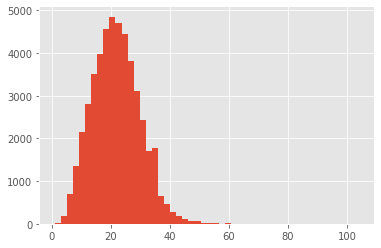

In [22]:
plt.hist([len(s) for s in sentences], bins = 50)
plt.show()

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [24]:
max_length = 50

In [25]:
X = [[word2idx[w[0]] for w in s] for s in sentences]
#python list comprehension

X = pad_sequences(maxlen = max_length, sequences = X, padding = 'post', value = num_words-1)

In [26]:
y = [[tag2idx[w[2]] for w in s] for s in sentences]

y = pad_sequences(maxlen = max_length, sequences = y, padding = 'post', value = tag2idx['O'])

y = [to_categorical(i, num_classes= num_tags) for i in y]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

#Building and Compiling a Bidirectional LSTM Model

In [28]:
from keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [29]:
#RNN -> GRU, LSTM
#bidirectional RNNs make use of past info, future info & current info for a specific time frame

In [30]:
#we are not using Sequential model for this application, but rather the Model class of keras API
#this allows for a bit more flexibility

In [31]:
#Spatial dropout for regularisation
#Time distributed layer so that we will be able to apply dense operations to each independent time step in the neural nw model

In [32]:
input_word = Input(shape = (max_length, ))

In [33]:
#Word Embeddings
#here we are doing raw word encoding, not part of speech tags
model = Embedding(input_dim = num_words, output_dim = max_length, input_length = max_length)(input_word)

In [34]:
#ordinarily you would apply dropout in your DNN and it would randomly drop nodes within the previous layer where the drops wouldve been independent of each other
#what spatial dropout does is, say, it drops the second value from the input. then it drops the second value from all the channels in that layer
#i.e, instead of dropping nodes, it drops 1D feature maps across the channels

In [35]:
#Spatial Dropout Layer
model = SpatialDropout1D(0.1)(model)

In [36]:
#RNNs suffer from the vanishing gradient problem or the exploding gradient problem

In [37]:
#Using Bidirectional instead of just lSTMs so that the model learns from the past, future and the current time period
model = Bidirectional(LSTM(units = 100, return_sequences = True, recurrent_dropout = 0.1))(model)

In [38]:
#applies a layer to every temporal slice of the input, and this is done independently
#the softmax activation function can be interpreted as a probability
#we look at the argmax of the return value and return the highest probability which corresponds to the predicted output class
out = TimeDistributed(Dense(num_tags, activation = 'softmax'))(model)

In [39]:
model = Model(input_word, out)

In [40]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758950   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 17)           3417      
 ibuted)                                                         
                                                             

In [41]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', #because this is a multi class classification problem
              metrics = [tf.keras.metrics.Accuracy()]
              )

#Training the Model

In [42]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [44]:
from livelossplot import PlotLossesKeras
from livelossplot.keras import PlotLossesCallback

In [45]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 2, verbose = 0, mode = 'max', restore_best_weights= False)

In [46]:
callbacks = [early_stopping, PlotLossesCallback()]

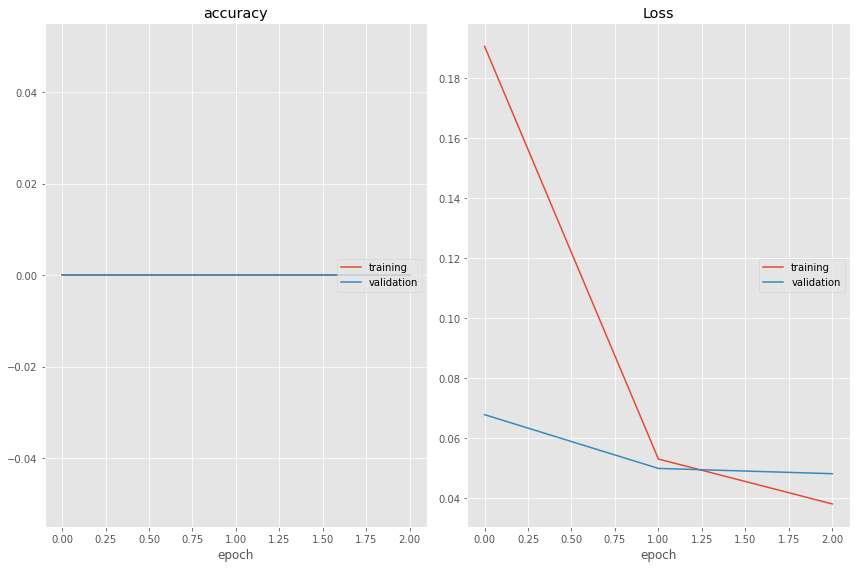

accuracy
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    0.038, max:    0.191, cur:    0.038)
	validation       	 (min:    0.048, max:    0.068, cur:    0.048)
1080/1080 [==============================] - 216s 200ms/step - loss: 0.0382 - accuracy: 0.0000e+00 - val_loss: 0.0482 - val_accuracy: 0.0000e+00


In [47]:
history = model.fit(
    X_train, np.array(y_train), 
    validation_split = 0.2, 
    batch_size = 32, 
    epochs = 100, 
    verbose = 1, 
    callbacks = callbacks
)

#Evaluating the NER Model

In [48]:
model.evaluate(X_test, np.array(y_test))

150/150 [==============================] - 5s 31ms/step - loss: 0.0497 - accuracy: 0.0000e+00


[0.04972962662577629, 0.0]

In [49]:
i = np.random.randint(0, X_test.shape[0])
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis = -1)

y_true = np.argmax(np.array(y_test), axis = -1)[i]

print("{:15}{:5}\t {}\n".format('Word', 'True', 'Pred'))
print('-'*30)
for w, true, pred in zip(X_test[i], y_true, p[0]):
  print("{:15}{:5}\t {}\n".format(words[w-1], tags[true], tags[pred]))

1/1 [==============================] - 0s 493ms/step
Word           True 	 Pred

------------------------------
The            O    	 O

United         B-geo	 B-geo

States         I-geo	 I-geo

has            O    	 O

103            O    	 O

nuclear        O    	 O

power          O    	 O

plants         O    	 O

in             O    	 O

31             O    	 B-tim

states         O    	 O

.              O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

arresting      O    	 O

a